# **ML models and their properties**



## **Boston house price prediction**

The problem that we are going to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price. To train our machine learning model with boston housing data, we will be using scikit-learn’s boston dataset.

# 1. Setup

The first step in ML coding is loading libraries. Libraries contain useful functions that allow you to avoid entering formulas manually.

Most useful libraries in Pythe are the following:

- Pandas: extermely useful forworking with tables, arrays and exporting data from spreadsheets [Pandas documetation and examples](https://pandas.pydata.org/docs/user_guide/10min.html)
- Numpy: best for math data massaging [Numpy documentation](https://numpy.org/doc/stable/user/whatisnumpy.html)
- Sci-kit learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting and k-means, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. It is the most basic ML framework and used to implement simple models, in comparison with TensorFlow and PyTorch, which are developed mostly for support of deep learning models [Documetation](scikit-learn.org)
- Matplotlib: basic visualisation library [Tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)
- Seaborn: slightly more sophisticated visualisation library, allows creation of pretty figures [Documentation](https://seaborn.pydata.org)



In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Next, we will load a dataset, that will allow us to use various ML models on it.

In this dataset, each row describes a boston town or suburb. There are 506 rows and 13 attributes (features) with a target column (price). For more detail see:
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [2]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

## 2. Data preparation and exploration

To make it easier to navigate in data, we will use a sctructure, called a dataframe. 
A dataframe will organise out Boston housing data nicely, detecting rows, columns, headers and indices.

In [3]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)

# See head of the dataset
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


That does not look very meaningful. Next step, we will load feature names and assign them as column headers. Remember, a **feature** is a piece of information used in the machine learning system as model input

In [4]:
# Adding the feature names to the dataframe
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Next step, we will specify the labels (or targets) in our data. 

In supervised learning, we are given a data set and already know what our correct output should look like, having the idea that there is a relationship between the input and the output.

Targets - our outputs, that we want to learn to predict.
Therefore, we set price of a house as our target.

In [5]:
# Adding target variable to dataframe
data['PRICE'] = boston.target 

# Median value of owner-occupied homes in $1000s
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Next, we want to check for missing values. Read how it works [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html).

In [6]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

[Describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function displays useful data statistics.

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This function analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. 

In [7]:
# Viewing descriptive statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Next, we want to explore how our features are correlated.

We will compute pairwise correlation of columns and plot them.

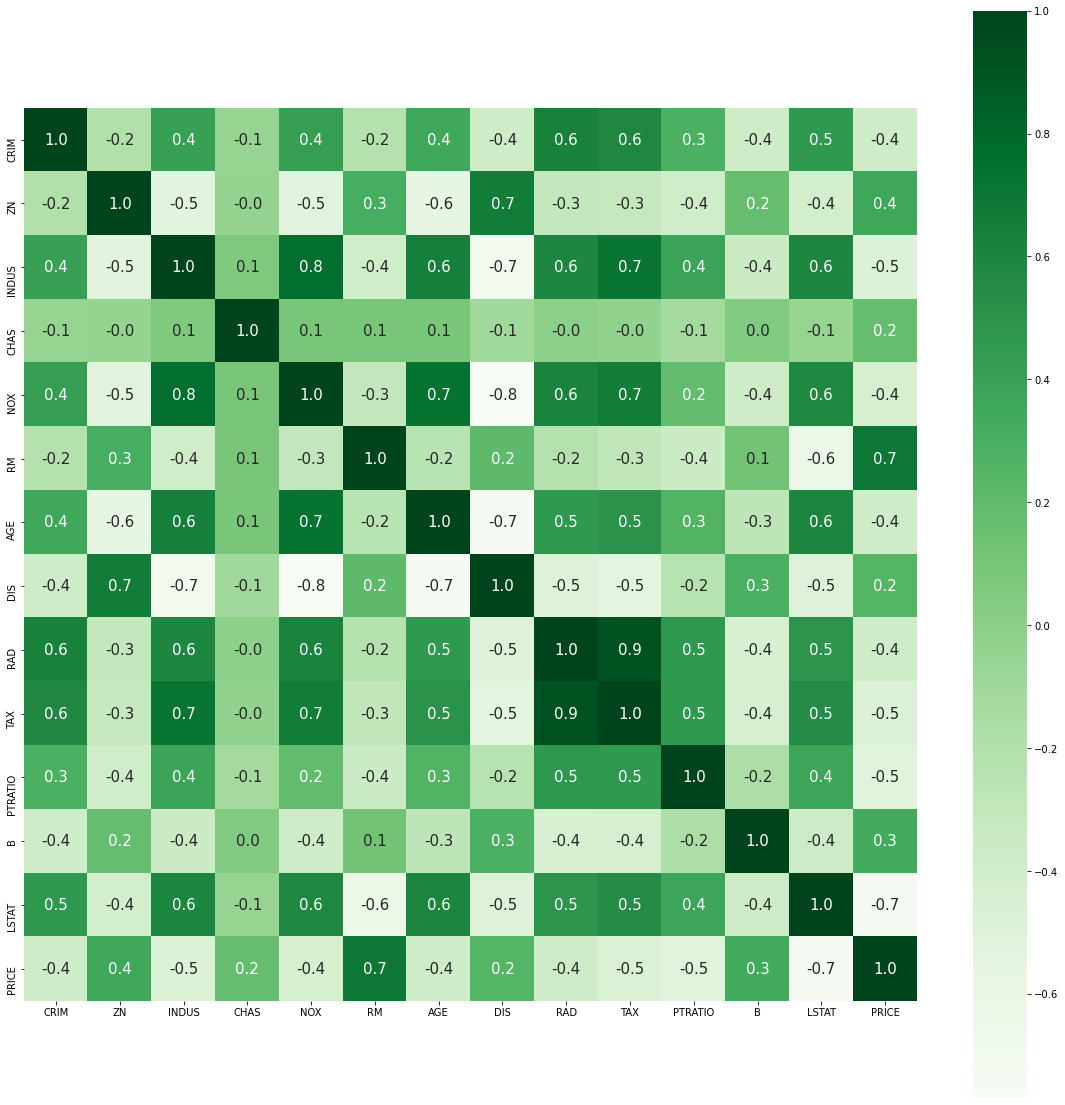

In [8]:
# Plotting the heatmap of correlation between features
corr = data.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

## 3. Splitting the data

Next, we will split tha data into features and targets. This will constitute our dataset.


In [9]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

To evaluate the performance of our model, we need to run it on the previously unseen data. For this reason, we usually divide the whole dataset into two subsets: training set and test set. 

We  **train** our model on the training set and we  **evaluate it's performance** on the test set. For this purpose, we calculate the model on each data point in the test set and estimate average performance. In the simple case, we calculate the difference between the real output and the desired output (the label for this data point), which is called an error. 

We say that the average error that we obtain on the test set is the performance of the model. Test set is usually much smaller that training set  (e.g. around 80% of the data is training set, and 20% of the data is test set). 

In [10]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

## 4. Algorithm #1

The first algorithm we are going to try is linear regression.

Linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Read more [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [11]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Regression models  posses the ability to learn features automatically from data and, at the same time, they are easily **interpretable**: i.e. they allow **direct interpretation** of the values of trained parameters. **Interpretability** of a ML model is of extreme importance, since the features that they learn can be easily assessed and the results, obtained with these features, can be explained.

One of the parameters to look at is intercept. 

In all linear regression models, the intercept has the same definition: the mean of the response, Y, when all predictors, all X = 0. 

Since the intercept is the mean of Y when all predictors equals zero, the mean is only useful if every X in the model actually has some values of zero. If they do, no problem.

But if one predictor is a variable like number of rooms in the house, there should be no values = zero. So while the intercept will be necessary for calculating predicted values, it has to no real meaning.

In [12]:
# Value of y intercept
lm.intercept_

35.554874536006324

In [13]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.115966
1,ZN,0.0471249
2,INDUS,0.0082598
3,CHAS,3.23405
4,NOX,-16.6866
5,RM,3.88411
6,AGE,-0.0108974
7,DIS,-1.5413
8,RAD,0.293208
9,TAX,-0.0134059


In [14]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In the next step, we evaluate the performance of our data with a few standart metrics.

In [15]:
# Model evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


R^2: 0.7415244219726307
Adjusted R^2: 0.7329085693717183
MAE: 3.2269621335646743
MSE: 21.197139922226427
RMSE: 4.604035178213393


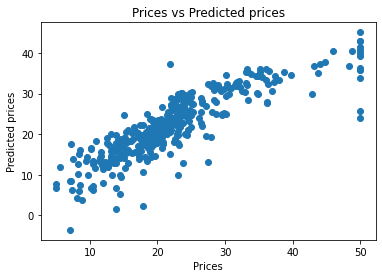

In [16]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

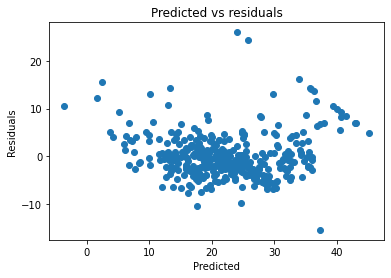

In [17]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

We also might be interested in distribution of errors in our predictions.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


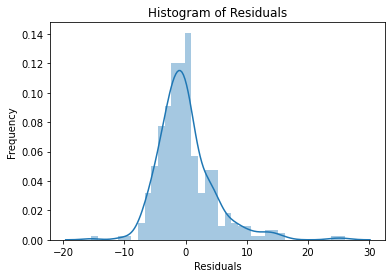

In [18]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [19]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
mse_lr = metrics.mean_squared_error(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.726345145970252
Adjusted R^2: 0.6859188607158575
MAE: 3.3677909837965774
MSE: 25.41958712682175
RMSE: 5.041784121402041


## 5. Algorithm #2

Next model we want to try is random forest.

Random forest (RF) is an ensemble classifier that uses multiple models of several decision trees to obtain a better prediction performance. It creates many classification trees and a bootstrap sample technique is used to train each tree from the set of training data.

RFs also provide measures of feature importance (permutation importance). Permutation importance is a common, reasonably efficient, and very reliable technique. It directly measures variable importance by observing the effect on model accuracy of randomly shuffling each predictor variable. This technique is broadly-applicable because it doesn't rely on internal model parameters, such as linear regression coefficients.

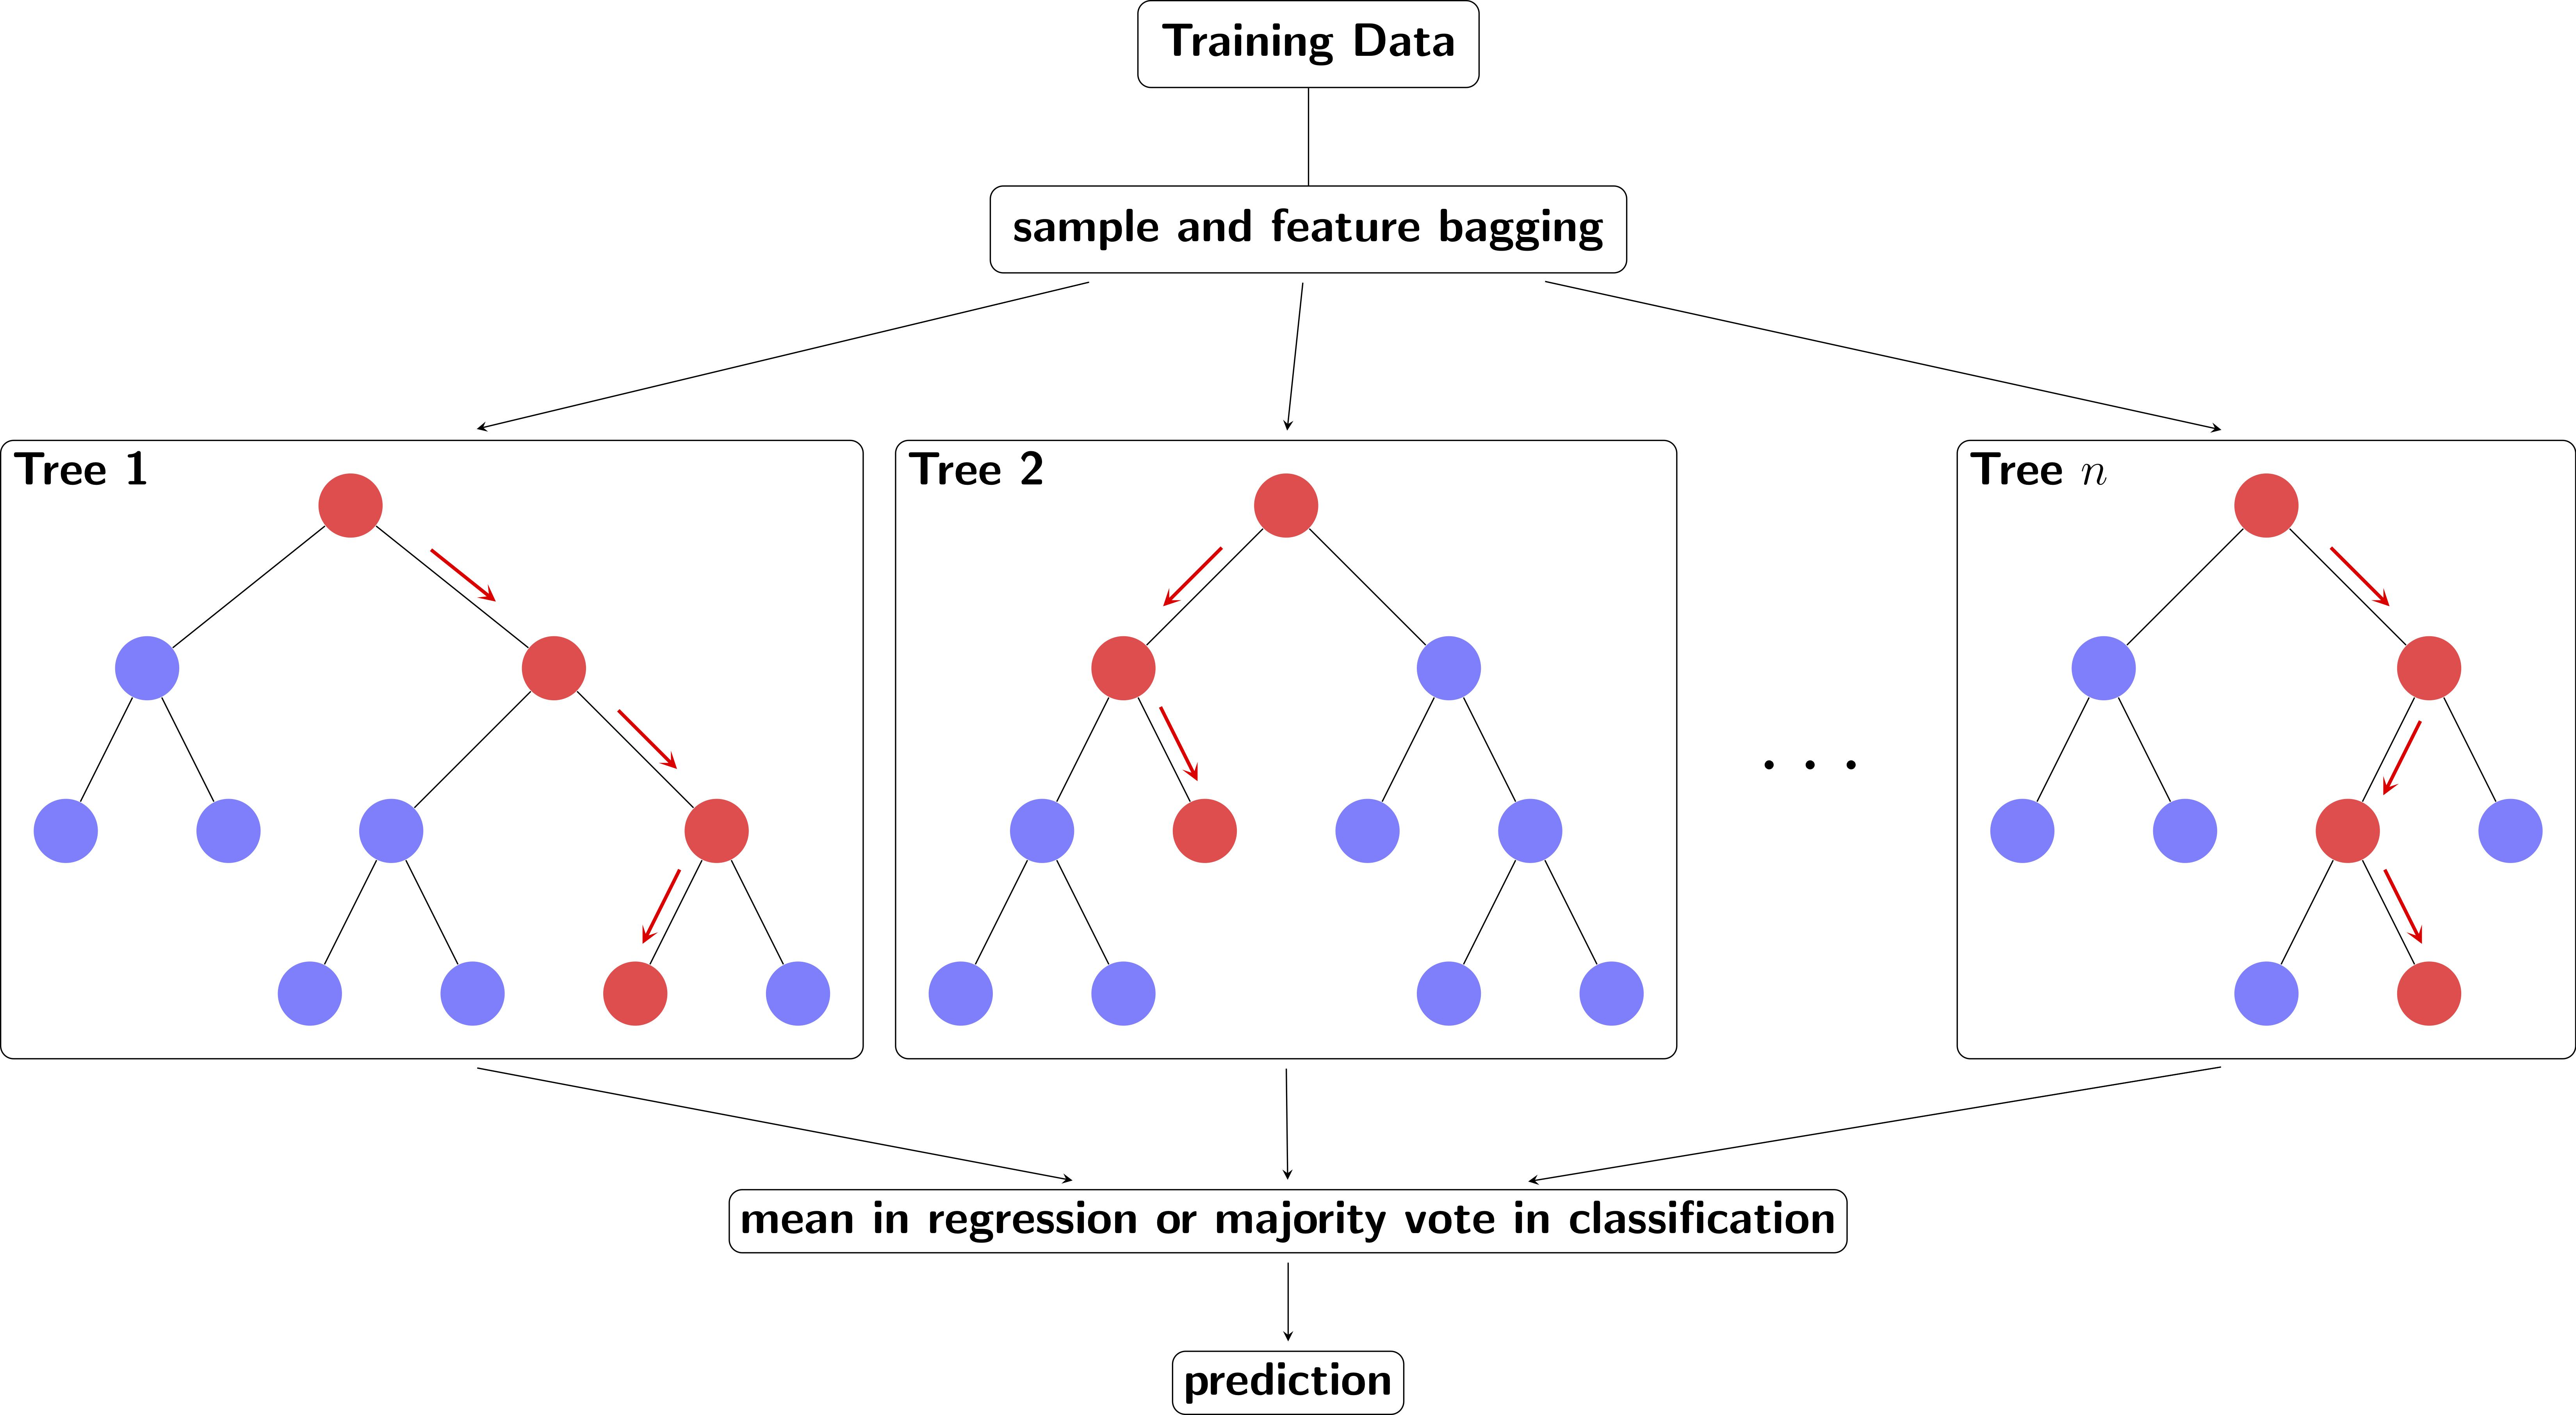

In [ ]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# Create the model
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

/Users/nefremova/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9724398693857361
Adjusted R^2: 0.9715211983652606
MAE: 0.9242821782178217
MSE: 2.260159158415842
RMSE: 1.5033825722070353


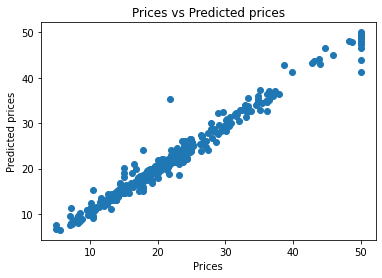

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

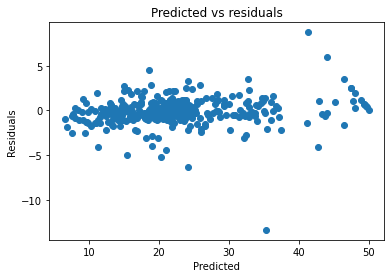

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# Predicting Test data with Algorithm 2
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
mse_rf = metrics.mean_squared_error(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7699606323129928
Adjusted R^2: 0.735977543904685
MAE: 2.454117647058823
MSE: 21.368178431372545
RMSE: 4.622572706986072
